/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Custom KMeans SSE for k=3: Daily SM Usage (hrs)                156883.585397
Peer Comparison Frequency (1-10)    340889.367206
Social Anxiety Level (1-10)         340865.460498
Self Confidence Impact (1-10)       113213.390105
dtype: float64


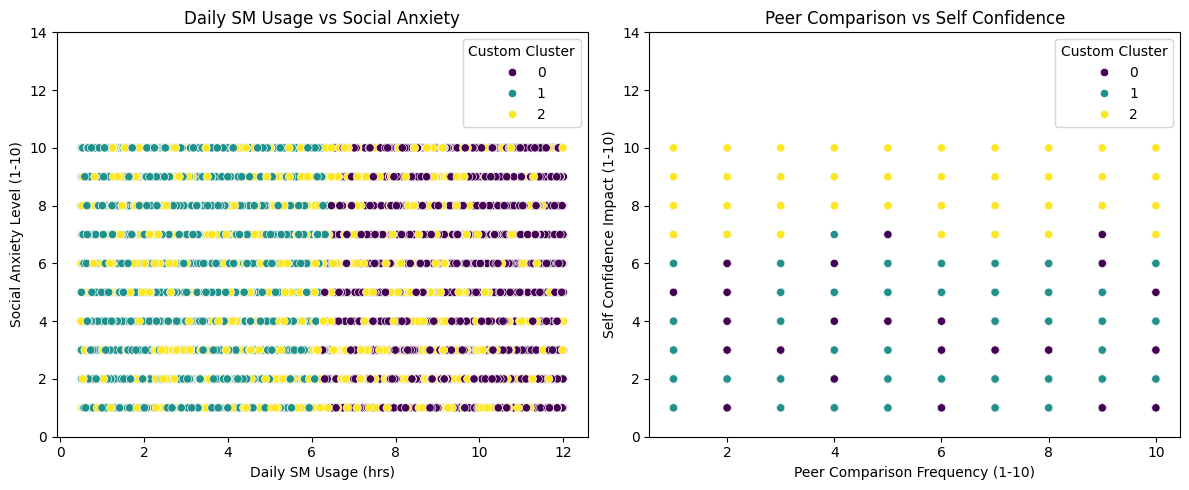

Sklearn KMeans SSE for k=3: 951880.5765142669


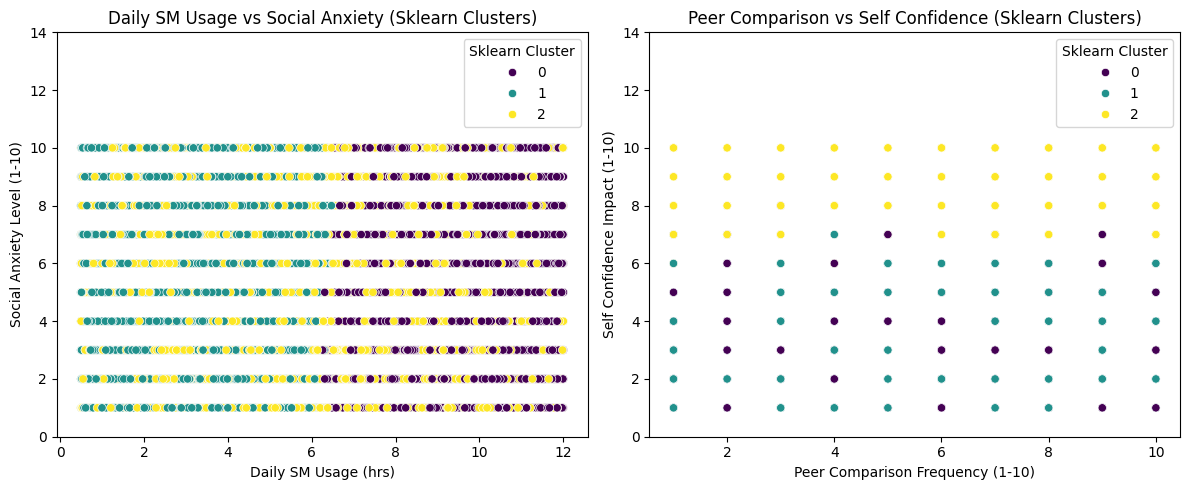

This notebook applied both Custom and Sklearn KMeans clustering to analyze patterns in social media usage and mental health.


In [1]:
# Clustering Notebook

# 1. Import Libraries and functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load clean data
data_df = pd.read_csv('../data/cleaned/South_East_Asia_Social_Media_MentalHealth_cleaned.csv')

# 2. Data Preparation
# Define the columns to cluster
columns_to_cluster = ['Daily SM Usage (hrs)', 'Peer Comparison Frequency (1-10)',
'Social Anxiety Level (1-10)', 'Self Confidence Impact (1-10)']

# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_df[columns_to_cluster]), columns=columns_to_cluster)

# 3. Define Custom KMeans Class
class CustomKMeans:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.cluster_assignments = None

    def initialize_centroids(self, df):
        return df.sample(n=self.k).values

    def assign_clusters(self, df):
        distances = np.linalg.norm(df.values[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def compute_centroids(self, df):
        centroids = np.zeros((self.k, df.shape[1]))
        for i in range(self.k):
            cluster_points = df[self.cluster_assignments == i]
            centroids[i] = cluster_points.mean(axis=0)
        return centroids

    def fit(self, df):
        self.centroids = self.initialize_centroids(df)
        for i in range(self.max_iters):
            self.cluster_assignments = self.assign_clusters(df)
            new_centroids = self.compute_centroids(df)
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            self.centroids = new_centroids

    def predict(self, df):
        return self.assign_clusters(df)

    def sse(self, df):
        total_sse = 0
        for i in range(self.k):
            cluster_points = df[self.cluster_assignments == i]
            total_sse += np.sum((cluster_points - self.centroids[i]) ** 2)
        return total_sse

# 4. Custom KMeans Clustering
k = 3
custom_kmeans = CustomKMeans(k=k)
custom_kmeans.fit(df_scaled)
predicted_clusters = custom_kmeans.predict(df_scaled)

# Add predicted clusters to the original dataframe
data_df['Custom Cluster'] = predicted_clusters

# Display SSE
sse_value = custom_kmeans.sse(df_scaled)
print(f"Custom KMeans SSE for k={k}: {sse_value}")

# 5. Visualization of Results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Daily SM Usage vs Social Anxiety
sns.scatterplot(ax=axes[0], x='Daily SM Usage (hrs)', y='Social Anxiety Level (1-10)', 
                hue='Custom Cluster', data=data_df, palette='viridis')
axes[0].set_title('Daily SM Usage vs Social Anxiety')
axes[0].set_ylim(0, 14) 

# Plot 2: Peer Comparison Frequency vs Self Confidence Impact
sns.scatterplot(ax=axes[1], x='Peer Comparison Frequency (1-10)', y='Self Confidence Impact (1-10)', 
                hue='Custom Cluster', data=data_df, palette='viridis')
axes[1].set_title('Peer Comparison vs Self Confidence')
axes[1].set_ylim(0, 14)
plt.tight_layout()
plt.show()

# 6. Compare with Sklearn KMeans
sklearn_kmeans = KMeans(n_clusters=k, random_state=42)
sklearn_kmeans.fit(df_scaled)
sklearn_clusters = sklearn_kmeans.predict(df_scaled)
data_df['Sklearn Cluster'] = sklearn_clusters

# Display Sklearn SSE
sklearn_sse = sklearn_kmeans.inertia_
print(f"Sklearn KMeans SSE for k={k}: {sklearn_sse}")

# Optionally, visualize the Sklearn clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Daily SM Usage vs Social Anxiety using Sklearn clusters
sns.scatterplot(ax=axes[0], x='Daily SM Usage (hrs)', y='Social Anxiety Level (1-10)', 
                hue='Sklearn Cluster', data=data_df, palette='viridis')
axes[0].set_title('Daily SM Usage vs Social Anxiety (Sklearn Clusters)')
axes[0].set_ylim(0, 14)

# Plot 2: Peer Comparison Frequency vs Self Confidence Impact using Sklearn clusters
sns.scatterplot(ax=axes[1], x='Peer Comparison Frequency (1-10)', y='Self Confidence Impact (1-10)', 
                hue='Sklearn Cluster', data=data_df, palette='viridis')
axes[1].set_title('Peer Comparison vs Self Confidence (Sklearn Clusters)')
axes[1].set_ylim(0, 14)
plt.tight_layout()
plt.show()

# 7. Conclusion
print("This notebook applied both Custom and Sklearn KMeans clustering to analyze patterns in social media usage and mental health.")
